In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import os


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
0,0.000011,0.000011,0.000188,2.813255e-05,0.903462,0.000031,0.002287,0.000010
1,0.000024,0.998812,0.020271,2.689498e-09,0.000012,0.000140,0.002949,0.001594
2,0.000057,0.009312,0.999565,1.297607e-09,0.000004,0.000050,0.001976,0.008503
3,0.000036,0.000004,0.004689,1.763011e-09,0.000013,0.999984,0.003752,0.006080
4,0.000025,0.000221,0.998231,4.486027e-10,0.000008,0.000012,0.003492,0.008268


In [ ]:
import scanpy as sc
# read Hao dataset
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/batch_corrected/Hao_PBMC_Harmony_unscaled.h5ad')
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')
labels = adata.obs['celltype.l1']
types = np.unique(labels).tolist()
types

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [ ]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden
L1_AAACCCAAGAAACTCA,Mono,CD14 Mono,CD14 Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4
L1_AAACCCAAGACATACA,CD4_T,CD4 TCM,CD4 TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2
L1_AAACCCACAACTGGTT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3
L1_AAACCCACAGCATACT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5


In [11]:
likelihood_df = pd.read_csv("L1_likelihood_df.csv", index_col=0)
likelihood_df.index = adata.obs.index
likelihood_df.head()

,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
L1_AAACCCAAGAAACTCA,0.000011,0.000011,0.000188,2.813255e-05,0.903462,0.000031,0.002287,0.000010
L1_AAACCCAAGACATACA,0.000024,0.998812,0.020271,2.689498e-09,0.000012,0.000140,0.002949,0.001594
L1_AAACCCACAACTGGTT,0.000057,0.009312,0.999565,1.297607e-09,0.000004,0.000050,0.001976,0.008503
L1_AAACCCACACGTACTA,0.000036,0.000004,0.004689,1.763011e-09,0.000013,0.999984,0.003752,0.006080
L1_AAACCCACAGCATACT,0.000025,0.000221,0.998231,4.486027e-10,0.000008,0.000012,0.003492,0.008268


In [ ]:
# Perform UMAP dimension reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(likelihood_df)


In [13]:
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=likelihood_df.index)
combined_df = pd.concat([embedding_df, adata.obs['celltype.l1']], axis=1)
combined_df.head()

,UMAP1,UMAP2,celltype.l1
L1_AAACCCAAGAAACTCA,7.648631,9.289748,Mono
L1_AAACCCAAGACATACA,-1.412748,-9.871761,CD4_T
L1_AAACCCACAACTGGTT,2.338112,8.329531,CD8_T
L1_AAACCCACACGTACTA,-5.499822,11.427943,NK
L1_AAACCCACAGCATACT,3.105371,8.418854,CD8_T


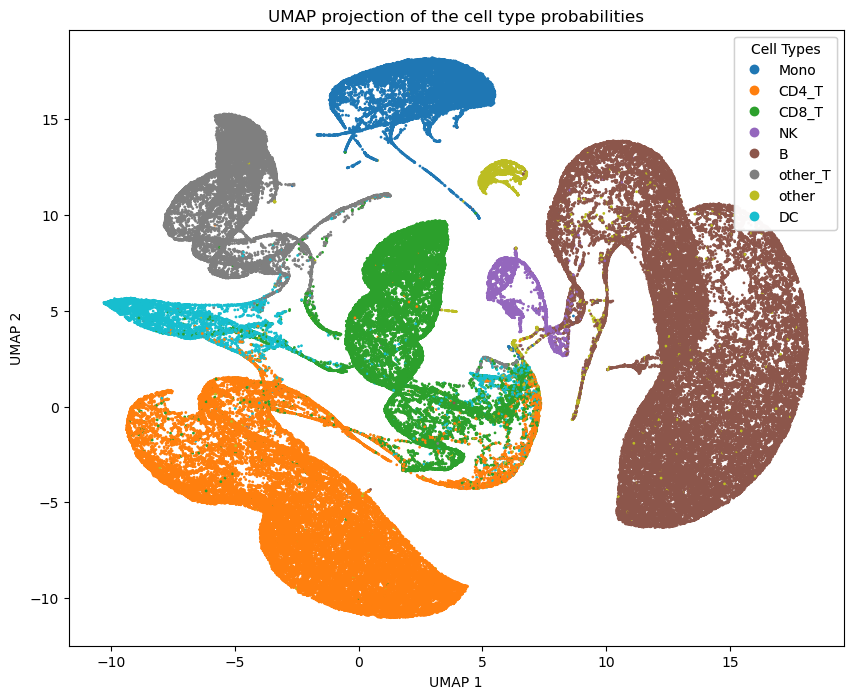

In [16]:
# Plot the UMAP result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(combined_df['UMAP1'], combined_df['UMAP2'], c=combined_df['celltype.l1'].astype('category').cat.codes, cmap='tab10', s=1)
plt.title('UMAP projection of the cell type probabilities')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# Create a legend
handles, labels = scatter.legend_elements(prop="colors")
legend = plt.legend(handles, adata.obs['celltype.l1'].unique(), title="Cell Types")
plt.gca().add_artist(legend)

plt.show()
